In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [3]:
os.makedirs("outputs", exist_ok=True)

In [4]:
df = pd.read_csv("csv_files/merged_data.csv")

In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (211224, 19)
Columns: Index(['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd',
       'side', 'time', 'start_position', 'direction', 'closedPnL', 'tx_hash',
       'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date',
       'Sentiment', 'leverage_proxy'],
      dtype='object')


,account,symbol,execution_price,size_tokens,size_usd,side,time,start_position,direction,closedPnL,tx_hash,order_id,crossed,fee,trade_id,timestamp,date,Sentiment,leverage_proxy
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,1.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,1.000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,0.999999
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,1.000001
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,1.000036


In [6]:
print("\nMissing values:")
print(df.isna().sum())



Missing values:
account            0
symbol             0
execution_price    0
size_tokens        0
size_usd           0
side               0
time               0
start_position     0
direction          0
closedPnL          0
tx_hash            0
order_id           0
crossed            0
fee                0
trade_id           0
timestamp          0
date               0
Sentiment          6
leverage_proxy     0
dtype: int64


In [7]:
df['Sentiment'] = df['Sentiment'].fillna("Unknown")
df['closedPnL'] = df['closedPnL'].fillna(0)

In [8]:
df['date'] = pd.to_datetime(df['date'], errors="coerce")

In [9]:
print("\nSummary Stats:")
print(df.describe())


Summary Stats:
       execution_price   size_tokens      size_usd  start_position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   

           closedPnL      order_id            fee      trade_id     timestamp  \
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05   
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12   
min   -117990.104100  1.732711e+08      -1.175712  0.000000e+00  1.680000e+12   
25%         0.000000  5.98385

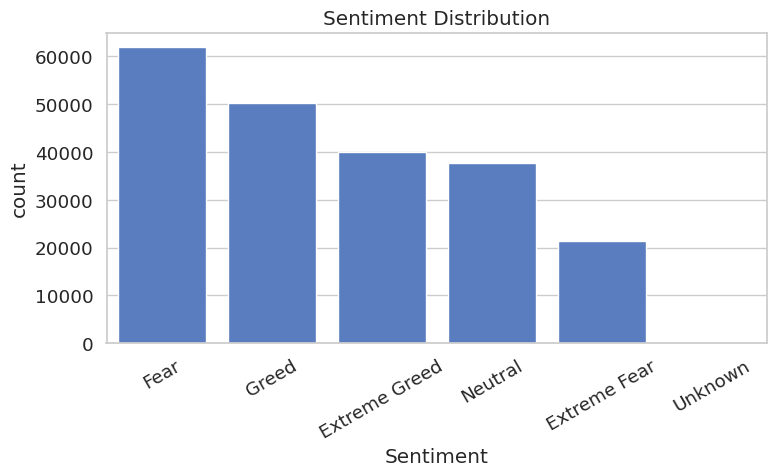

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index)
plt.title("Sentiment Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/sentiment_distribution.png")
plt.show()

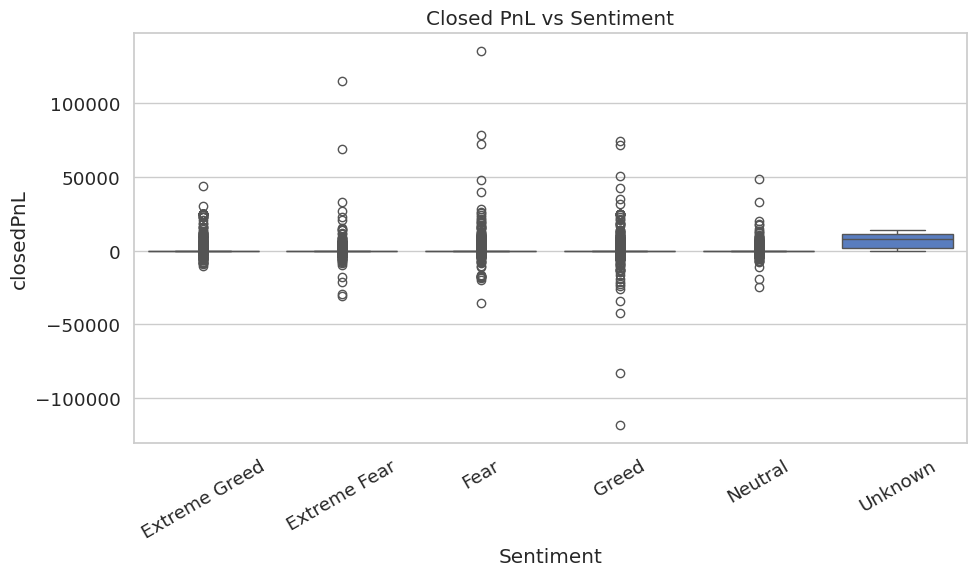

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sentiment", y="closedPnL")
plt.title("Closed PnL vs Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

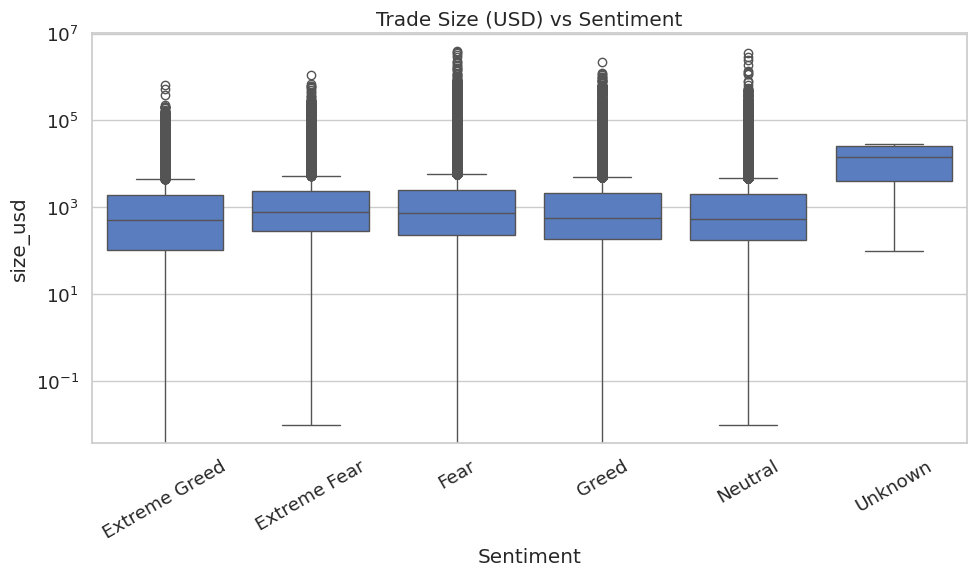

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sentiment", y="size_usd")
plt.title("Trade Size (USD) vs Sentiment")
plt.yscale("log")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/trade_size_vs_sentiment.png")
plt.show()

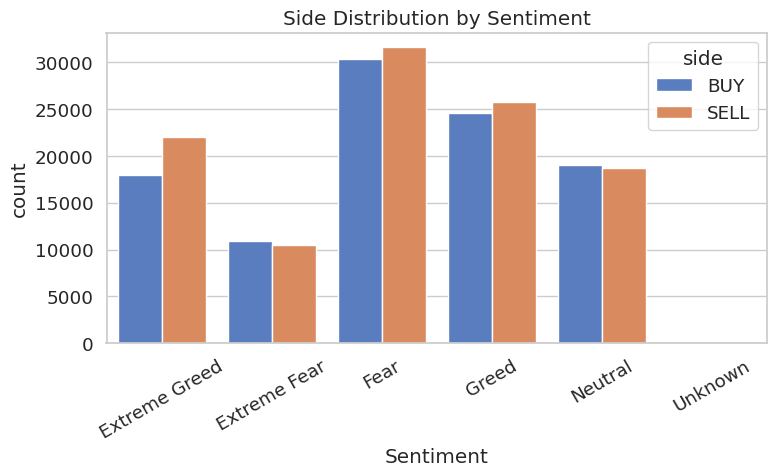

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentiment", hue="side")
plt.title("Side Distribution by Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/side_vs_sentiment.png")
plt.show()

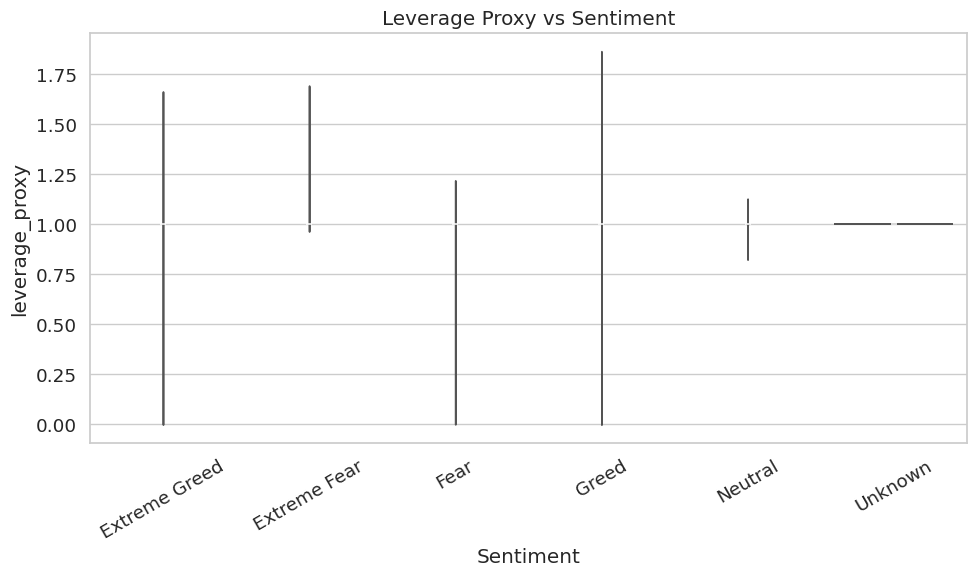

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Sentiment", y="leverage_proxy")
plt.title("Leverage Proxy vs Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/leverage_vs_sentiment.png")
plt.show()

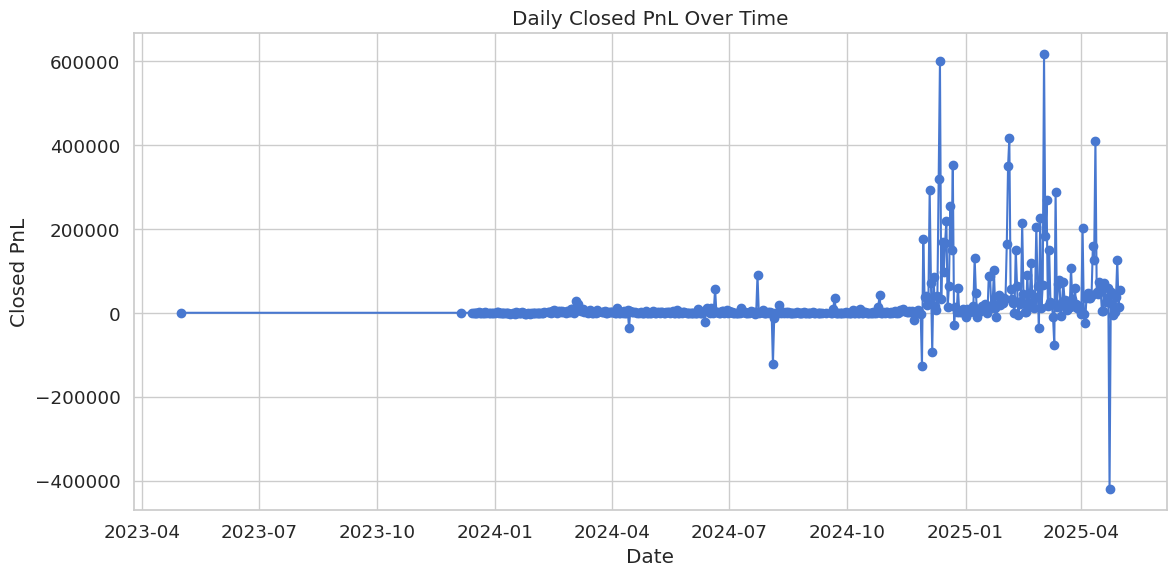

In [15]:
daily_pnl = df.groupby("date")["closedPnL"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_pnl["date"], daily_pnl["closedPnL"], marker="o")
plt.title("Daily Closed PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.savefig("outputs/daily_pnl_timeseries.png")
plt.show()

In [16]:
numeric_cols = ["execution_price", "size_tokens", "size_usd", "closedPnL", "leverage_proxy"]
corr = df[numeric_cols].corr()

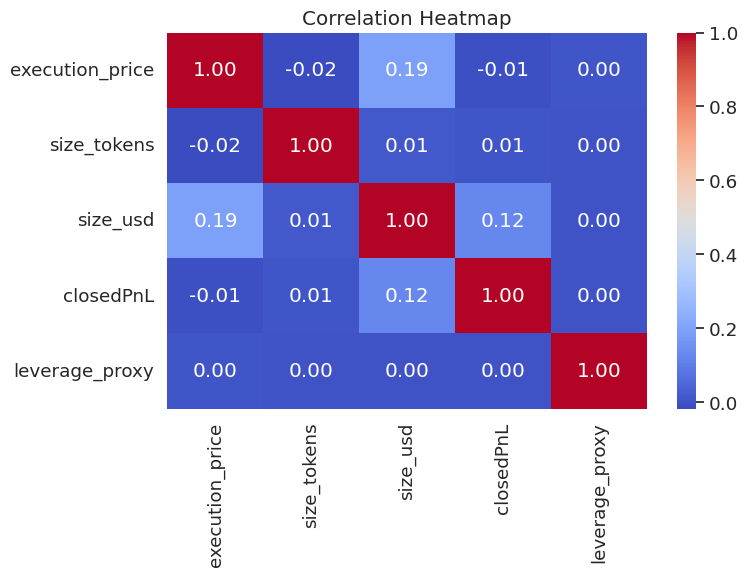

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png")
plt.show()

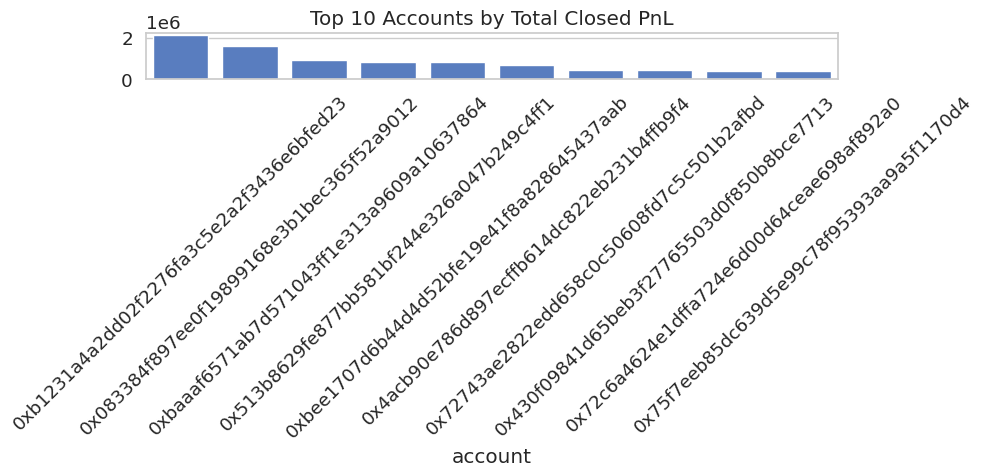

✅ EDA Completed! Plots are saved in 'outputs/' folder.


In [18]:
account_pnl = df.groupby("account")["closedPnL"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=account_pnl.index, y=account_pnl.values)
plt.title("Top 10 Accounts by Total Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/top_accounts_pnl.png")
plt.show()

print("✅ EDA Completed! Plots are saved in 'outputs/' folder.")

In [20]:
# Sentiment KPI Summary (Profitability, Risk, Volume, Leverage)
df = pd.read_csv("csv_files/merged_data.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['is_win'] = (df['closedPnL'] > 0).astype(int)

kpi = (
    df.groupby('Sentiment')
      .agg(
          trades=('closedPnL','size'),
          win_rate=('is_win','mean'),
          mean_pnl=('closedPnL','mean'),
          median_pnl=('closedPnL','median'),
          pnl_std=('closedPnL','std'),
          avg_size_usd=('size_usd','mean'),
          median_size_usd=('size_usd','median'),
          median_lev_proxy=('leverage_proxy','median')
      )
      .reset_index()
)

# side distribution (buy/sell share)
side_counts = df.pivot_table(index='Sentiment', columns='side', values='closedPnL', aggfunc='size', fill_value=0)
side_share = (side_counts.T / side_counts.sum(axis=1)).T.reset_index()

kpi = kpi.merge(side_share, on='Sentiment', how='left')
kpi['win_rate'] = (kpi['win_rate']*100).round(1)

from IPython.display import display
display(kpi)

kpi.to_csv("outputs/sentiment_summary_metrics.csv", index=False)

# optional: daily PnL by sentiment (for report tables)
daily = df.groupby(['date','Sentiment'])['closedPnL'].sum().reset_index()
daily_pivot = daily.pivot(index='date', columns='Sentiment', values='closedPnL').fillna(0)
daily_pivot.to_csv("outputs/daily_pnl_by_sentiment.csv")


,Sentiment,trades,win_rate,mean_pnl,median_pnl,pnl_std,avg_size_usd,median_size_usd,median_lev_proxy,BUY,SELL
0,Extreme Fear,21400,37.1,34.537862,0.0,1136.056091,5349.731843,766.150,1.0,0.510981,0.489019
1,Extreme Greed,39992,46.5,67.892861,0.0,766.828294,3112.251565,500.050,1.0,0.448590,0.551410
2,Fear,61837,42.1,54.290400,0.0,935.355438,7816.109931,735.960,1.0,0.489513,0.510487
3,Greed,50303,38.5,42.743559,0.0,1116.028390,5736.884375,555.000,1.0,0.488559,0.511441
4,Neutral,37686,39.7,34.307718,0.0,517.122220,4782.732661,547.655,1.0,0.503343,0.496657
